In [1]:
import matplotlib.pyplot as plt
import numpy as np
from run import g, temp, gs, gss
from run import with_spline_ODE, steps_taken
import der

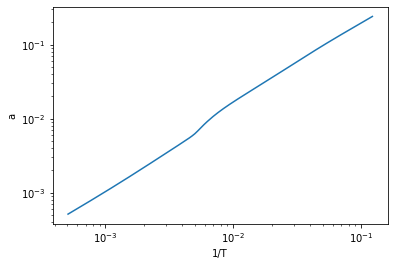

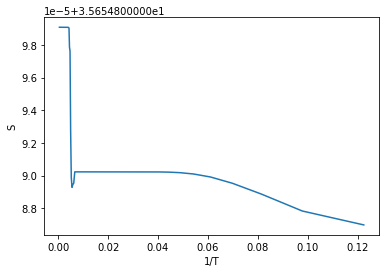

In [2]:
index = np.where(temp <1/2000)[0][-1]
index2 = np.where(temp < 1/10)[0][-1]

N = 1000
f_initial = np.zeros(N)
y_0 = np.zeros(N+3)
p = np.zeros(N+15) 

x0 = temp[index] 
dx0 = x0 / 1000
xf = temp[index + 1]

Le0 = 7.6e-4

y_0[:N] = f_initial
y_0[-3:] = [Le0, 0, x0]
p[:N] = np.linspace(10/N, 10, N)
p[-5:] = [Le0, Le0, y_0[-3], 10**(-10), 0.064]
p[-10:-5] = gs[index, :] 
p[-15:-10] = gss[index, :] 


x, y , dx, s = steps_taken(x0, y_0, dx0, p, xf, index, index2)


plt.figure()
plt.loglog(x,y[:,-1])
plt.xlabel("1/T")
plt.ylabel("a")
plt.show()


plt.figure()
plt.plot(x, s)
plt.xlabel("1/T")
plt.ylabel("S")

plt.show()

In [3]:
mixing_angle  = str(p[-2])
lepton_number = str(p[-3])

np.savez(lepton_number +'x'+ mixing_angle , T = 1/x, #temperature 
                       final_distribution = y[-1,:N], #final sterile distribution
                                  epsilon = p[:N],  #epsilon array
                                  lep_evo = y[:,-3], #Lepton number evolution
                                        a = y[:,-1], #scale factor
                                        t = y[:,-2], #time evolution
                              sterile_evo = y[:,:N], #sterile distribution evolution
                                mass_s    = p[-1], #mass
                        mixangle_medium   = p[-2], #mixing angle
                         initial_electron  = p[-3], ###initial lepton numbers 
                         initial_mu       = p[-4],
                         initial_tau      = p[-5])




['T', 'final_distribution', 'epsilon', 'lep_evo', 'a', 't', 'sterile_evo', 'mass_s', 'mixangle_medium', 'initial_electron', 'initial_mu', 'initial_tau']
0.00076


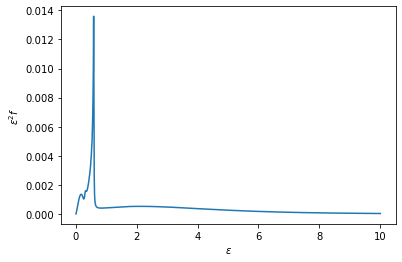

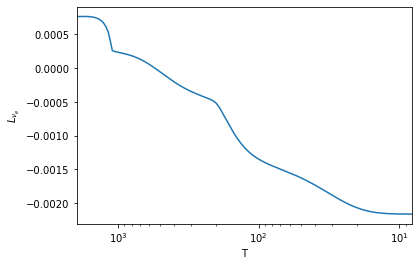

In [4]:
test = np.load('0.00076x1e-10.npz')
print(test.files)
print(test['initial_tau'])


dat = np.load('0.00076x1e-10.npz')
fe = dat['final_distribution']
epsilon = dat['epsilon']
plt.figure()
plt.plot(epsilon, epsilon**(2)*fe)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r"$\epsilon^2 f$")

plt.show() ##proportional to a number density spectrum

plt.figure()
plt.semilogx(dat['T'], dat['lep_evo'])
plt.xlim(max(dat['T']),min(dat['T']))
plt.xlabel("T")
plt.ylabel(r"$L_{\nu_e}$")
plt.show()